# Statystyka matematyczna - ćwiczenia laboratoryjne 2023/2024

Ten notatnik zalicza się do grupy zestawów zadań, na podstawie których odbywa się zaliczenie ćwiczeń i podlega zwrotowi do oceny w ustalonym na zajęciach terminie.

Uwagi i wytyczne ogólne dotyczące uzupełniania notatnika:
- Podczas wykonywania zadań należy korzystać wyłącznie z pakietów zaimportowanych na początku notatnika oraz z pakietów wchodzących w skład standardowej biblioteki Pythona, które można zaimportować samodzielnie we wskazanej komórce notatnika.
- Swoje rozwiązania należy wprowadzać wyłącznie w miejce następujących fragmentów kodu:<br/> `# YOUR CODE HERE`<br/> `raise NotImplementedError()`<br/> 
a odpowiedzi tekstowe w komórkach oznaczonych hasłem:<br/> 
`YOUR ANSWER HERE`<br/> 
Nie należy w żaden sposób modyfikować pozostałych fragmentów kodu oraz innych elementów notatnika, w szczególności dodawać lub usuwać komórek oraz zmieniać nazwy pliku.
- Otrzymywane wyniki i odpowiedzi mają być rezultatem wykonania napisanego kodu.
- Zadanie należy wykonać w taki sposób, aby podczas wykonywania kodu nie zostały wyświetlone żadne ostrzeżenia.
- Zawarte w notatniku automatyczne testy mają charakter poglądowy. Dotyczą one wybranych aspektów zadań i mają za zadanie wyłapać podstawowe błędy. Przejście wszystkich testów nie oznacza, że zadanie jest wykonane w całości poprawnie.

Uwagi i wytyczne ogólne dotyczące wizualizacji wyników:
- Wszystkie wykresy powinny być wykonane w jednolitym, przejrzystym i czytelnym stylu, posiadać odpowiednio dobrane proporcje i zakresy wartości osi.
- Wykresy oraz ich osie powinny mieć nadane tytuły. Jeżeli w obrębie figury znajduje się więcej niż jeden wykres to figura również powinna mieć nadany tytuł. 
- Figury powinny mieć ustawione białe tło, tak, aby niezależnie od ustawień notatnika wszystkie elementy wykresów były dobrze widoczne (domyślnie tło jest przeźroczyste co może powodować problemy w notatnikach z ustawionym ciemnym tłem).
- Rozmiar poziomy figur nie powinien przekraczać 20 cali.

Przed odesłaniem zestawu zadań do oceny proszę uzupełnić komórkę z danymi autora rozwiązania (imię, nazwisko i numer indeksu) oraz upewnić się, że notatnik działa zgodnie z oczekiwaniami. W tym celu należy skorzystać z opcji **Restart Kernel and Run All Cells...** dostępnej na górnej belce notatnika pod symbolem $\blacktriangleright\blacktriangleright$.

Imię i nazwisko: Katarzyna Wesołowska
Numer indeksu: 415124

---

# Kolowkium zaliczeniowe: 1 termin, grupa 5

In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Miejsce do importu pakietów wchodzących w skład standardowej biblioteki Pythona oraz ustawienie opcji wykorzystywanych pakietów

## Dane do automatycznych testów

In [3]:
x = sp.stats.uniform.rvs(loc=-2, scale=10, size=250, random_state=34)
y = 2*x - 5 + sp.stats.norm.rvs(loc=0, scale=2, size=250, random_state=13)
test_data_1 = pd.DataFrame(data=np.array([x, y]).T, columns=["X", "Y"])
test_data_1.head()

,X,Y
0,-1.614383,-9.653548
1,5.801005,8.109542
2,-1.072962,-7.234931
3,4.328927,4.561478
4,-1.861092,-6.031980


In [4]:
test_data_2 = pd.DataFrame(data=sp.stats.norm.rvs(loc=5, scale=0.2, size=15, random_state=7), columns=["X"])
test_data_2.head()

,X
0,5.338105
1,4.906813
2,5.006564
3,5.081503
4,4.842215


## Zadanie 1 [4 pkt]

Załóżmy, że proces przybywanie klientów do sklepu odbywa się zgodnie z procesem Poissona o wartości oczekiwanej 0.25 klientów na minutę.

Jakie jest prawdopodobieństwo, że pierwszy z klientów pojawi się w sklepie w ciągu 10 minut od jego otwarcia?

Wynik zapisz do zmiennej `p`.

In [5]:
p = 1-sp.stats.poisson.pmf(0, 0.25*10)
p

0.9179150013761012

In [6]:
# Komórka testowa
assert isinstance(p, float)


## Zadanie 2 [6 pkt]

Przygotuj funkcję `correlation_estimation()`, która będzie dokonywała estymacji przedziałowej współczynnika korelacji liniowej Pearsona dla danych wejściowych w postaci szeregu szczegółowego zgodnie z informacjami zawartymi w docstring funkcji oraz ze schematem z załączonego do notatnika zestawu wzorów.

Uwaga! Zadanie dotyczy tradycyjnej estymacji, nie metody bootstrap.

In [7]:
def correlation_estimation(data, alpha):
    """
    Parameters
    -------
    data: DataFrame
        Tablica zawierająca domyślny indeks i dwie kolumny "X" i "Y" z wynikami próby losowej.
    alpha: float
        Wartość określająca poziom istotności.
    
    Returns
    -------
    r_corr_low: float
        Dolna granica wyliczonego przedziału ufności.
    r_corr_high: float
        Górna granica wyliczonego przedziału ufności.
    """   
    n = len(data) #liczba obserwacji
    X = data['X']
    Y = data['Y']
    X_mean = x.mean() #średnia X
    Y_mean = y.mean() #średnia Y

    #wzór
    licznik = np.sum((x - X_mean) * (y - Y_mean))
    mianownik = np.sqrt(np.sum((x - X_mean)**2) * np.sum((y - Y_mean)**2))
    est = licznik / mianownik #estymator
    
    d = sp.stats.norm.ppf(1-alpha/2) 
   
    #przedział
    r_corr_low = est - d * (1 - est**2) / np.sqrt(n)
    r_corr_high = est + d * (1 - est**2) / np.sqrt(n)

    #print(f"Est należy do przedziału [{r_corr_low}, {r_corr_high}]")
    return r_corr_low, r_corr_high

In [8]:
# Komórka testowa
result = correlation_estimation(test_data_1, 0.1)
assert type(result)==tuple or type(result)==list
assert len(result)==2
assert isinstance(result[0], float)
assert isinstance(result[1], float)


## Zadanie 3 [6 pkt]

Przygotuj funkcję `variance_NHST()`, która będzie weryfikować hipotezę o wartości wariancji dla danych wejściowych w postaci szeregu szczegółowego zgodnie z informacjami zawartymi w docstring funkcji oraz ze schematem z załączonego do notatnika zestawu wzorów.

Uwaga! Zadanie dotyczy tradycyjnej weryfikacji, nie metody bootstrap.

In [9]:
def variance_NHST(data, H0, H1, alpha):
    """
    Parameters
    -------
    data: DataFrame
        Tablica zawierająca domyślny indeks i kolumnę "X" wynikami próby losowej.
    H0: float
        Wariancji przyjęta jako hipoteza zerowa.
    H1: str
        Postać hipotezy alternatywnej, przyjmuje wartości:
        - two-sided: wariancja jest różna od wartości przyjętej w H0,
        - less: wariancja jest mniejsza od wartości przyjętej w H0,
        - greater: wariancja jest większa od wartości przyjętej w H0.
    alpha: float
        Wartość określająca poziom istotności.
    
    Returns
    -------
    chi2: float
        Wyliczona na podstawie próby losowej wartość statystyki chi2.
    chi2_alpha: float or list
        Wartość statystyki chi2_alpha lub lista z dwoma wartościami chi2_alpha_1 i chi2_alpha_2
    H: int
        Wynik testu statystycznego, przyjmuje wartość:
        0 - gdy wynik testu istotności nie daje podstaw do odrzucenia H0 na rzecz H1 na poziomie istotności 1-alpha,
        1 - gdy następuje odrzucenie H0 na rzecz H1 na poziomie istotności 1-alpha.
    """
    n = len(data)
    var = np.var(data['X'], ddof=1)
    chi2 = (n-1)*var/H0
    df = n-1
    
    if H1 == 'two-sided':
        chi2_1 = sp.stats.chi2.ppf(alpha/2, df)
        chi2_2 = sp.stats.chi2.ppf(1-alpha/2, df)
        chi2_alpha = [chi2_1, chi2_2]
        if chi2 <= chi2_1 or chi2 >= chi2_2:
            H = 1
        else:
            H = 0
    
    elif H1 == 'less':
        chi2_alpha = sp.stats.chi2.ppf(alpha, df)
        if chi2 <= chi2_alpha:
            H = 1
        else:
            H = 0
    
    elif H1 == 'greater':
        chi2_alpha = sp.stats.chi2.ppf(1-alpha,df)
        if chi2 >= chi2_alpha:
            H = 1
        else:
            H = 0

    #print(f"Wartość statystyki chi2: {chi2}\nWartość statystyki chi2_alpha: {chi2_alpha}\nWynik testu statystycznego H: {H}\n\n")
    return chi2, chi2_alpha, H

In [10]:
# Komórka testowa
result = variance_NHST(test_data_2, 0.1, "two-sided", 0.05)
assert type(result)==tuple or type(result)==list
assert len(result)==3
assert isinstance(result[0], float)
assert type(result)==tuple or type(result)==list
assert isinstance(result[2], float) or isinstance(result[2], int)

result = variance_NHST(test_data_2, 0.1, "less", 0.05)
assert type(result)==tuple or type(result)==list
assert len(result)==3
assert isinstance(result[0], float)
assert isinstance(result[0], float)
assert isinstance(result[2], float) or isinstance(result[2], int)


## Zadanie 4 [12 pkt]

Zmienna `pines` zawiera wyniki pomiarów drzew rosnących na plantacji:
 - Row - numer rzędu w plantacji
 - Col - numer kolumny w plantacji
 - Hgt97 - wysokość drzewa we wrześniu 1997 roku (cm)
 - Diam97 - średnica pnia drzewa we wrześniu 1997 roku (cm)
 - Spread97 - największa szerokość boczna we wrześniu 1997 roku (cm)
 - Needles97 - długość igieł we wrześniu 1997 roku (mm)
 - Spacing - odległość (w stopach) między drzewami (10 lub 15)

In [11]:
pines = pd.read_csv("pines_data.csv", index_col=0)
pines

,Row,Col,Hgt97,Diam97,Spread97,Needles97,Spacing
1,R1,C2,362.0,6.6,162.0,66.0,15
2,R1,C3,442.0,9.3,250.0,77.0,15
4,R1,C5,369.0,7.0,176.0,72.0,15
5,R1,C6,365.0,6.9,215.0,76.0,15
6,R1,C7,356.0,7.6,238.0,74.5,15
...,...,...,...,...,...,...,...
994,R44,C22,287.0,3.7,116.0,65.0,10
995,R44,C23,448.0,6.4,229.0,85.0,10
996,R44,C24,388.0,7.0,206.0,63.0,10
997,R44,C25,381.0,7.2,241.0,63.0,10


### a)
W oparciu o dane ze zmiennej `pines` przygotuj zestaw wykresów korelacyjnych poszczególnych par parametrów z wykresami kde na przekątnej (pairplot) zestawiające ze sobą poszczególne parametry liczbowe (osie X, Y) z podziałem na odstępy w jakich rosną drzewa (rozróżnione kolorem) i ustaw:
 - inną od domyślnej skalę kolorów (każdy odstęp ma przypisany inny kolor wykresu),
 - inne od domyślnych własności punktów (kształt, wielkość, przeźroczystość) dobrane tak, aby wykres był jak najbardziej czytelny.

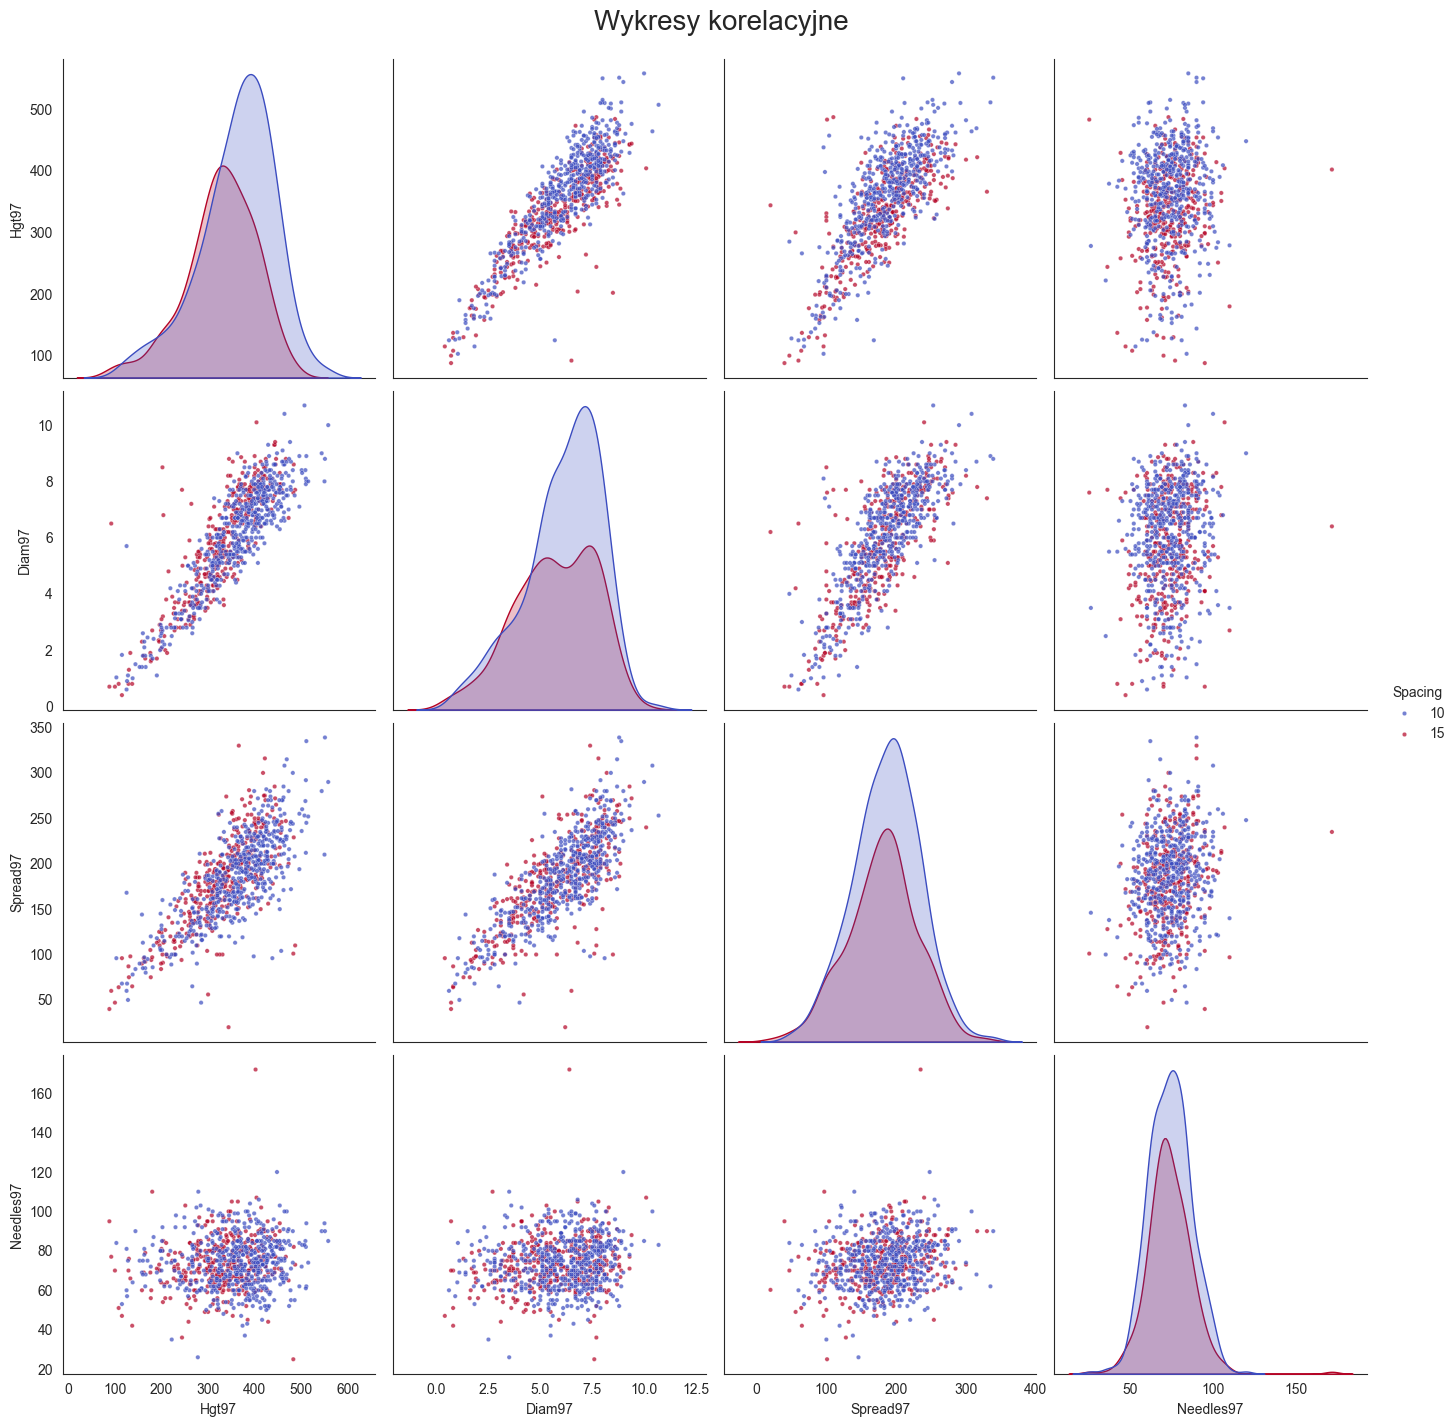

In [12]:
sns.set_style("white")
plot =sns.pairplot(pines,hue="Spacing", palette="coolwarm",diag_kind='kde',plot_kws={'marker': 'o','s': 10,'alpha': 0.7},height=3.5, aspect=1)
plot.fig.suptitle('Wykresy korelacyjne', y=1.02, size=20)
plt.show()

### b)
W oparciu o dane ze zmiennej `pines` przygotuj wykresy boxplot i swarmplot wybranego przez siebie parametru liczbowego (oś Y) z podziałem na rozróżnione kolorem odstępy w jakich rosną drzewa (oś X).

Wykresy zestaw na pojedynczej figurze (1x2 pola na wykres). Przygotowując figurę kieruj się wytycznymi z początku notatnika. Dodatkowo ustaw:
 - dla wykresu boxplot:
     - inne od domyślnych kolory wykresu oraz widoczny znacznik wartości średniej,
 - dla wykresu swarmplot:
     - inne od domyślnych rozmiar i kolory punktów (dobierz rozmiar tak, aby na wykresie zmieścił się komplet punktów) oraz rozsunięcie poszczególnych grup punktów.

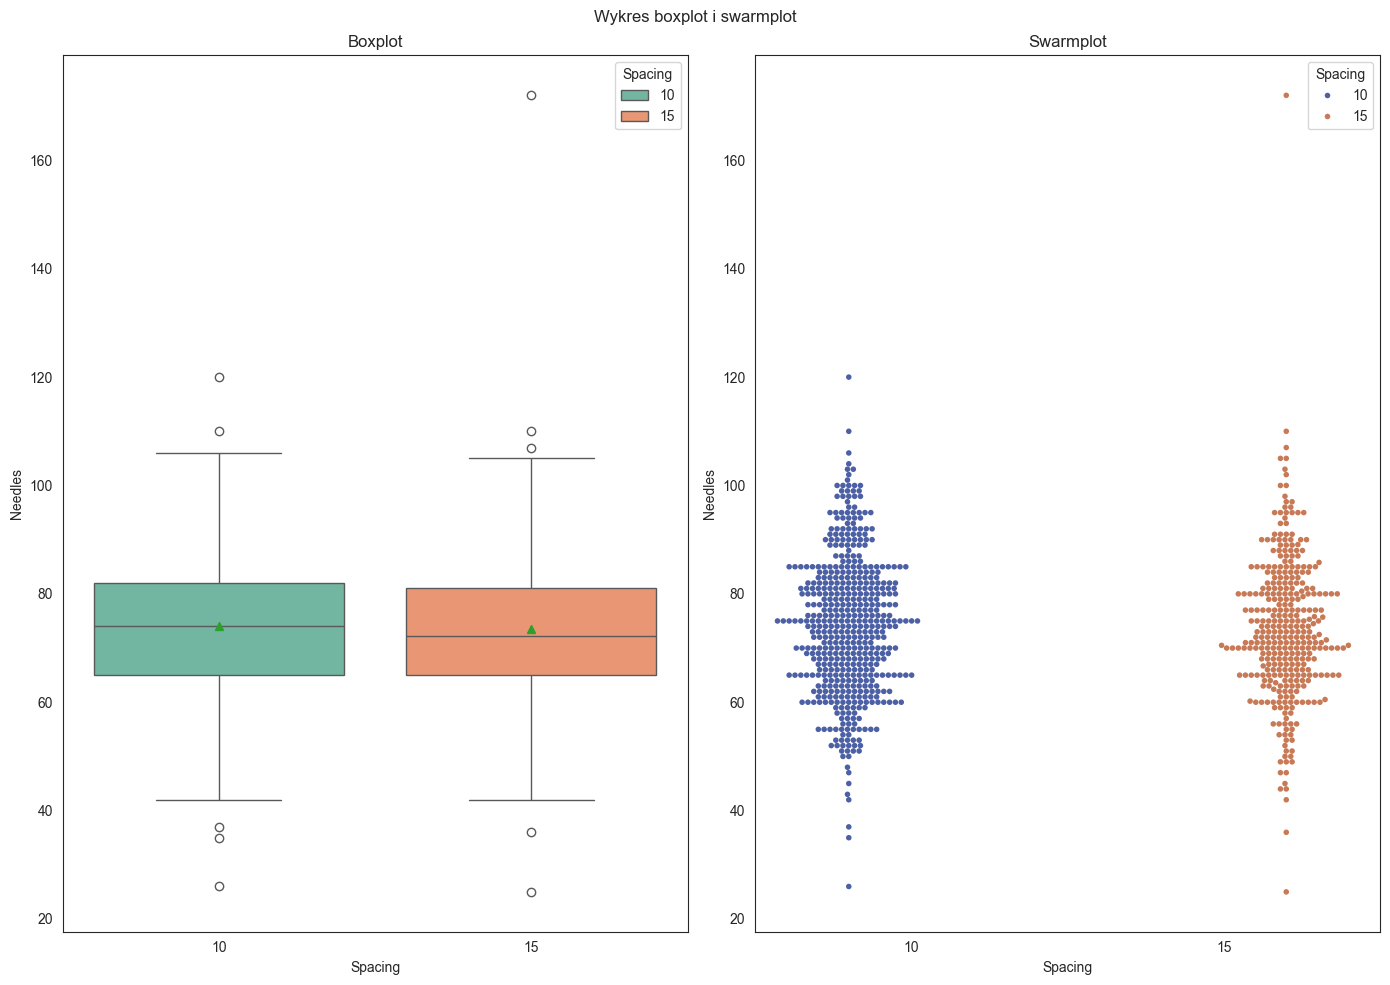

In [13]:
fig, axes = plt.subplots(1, 2, figsize=(14, 10))
fig.suptitle("Wykres boxplot i swarmplot")
sns.set_style("white")

#boxplot
sns.boxplot(x='Spacing',y='Needles97',data=pines,hue='Spacing',ax=axes[0],palette="Set2",showmeans=True)
axes[0].set_title("Boxplot")
axes[0].set_xlabel('Spacing')
axes[0].set_ylabel('Needles')

#swarmplot
sns.swarmplot(x='Spacing',y='Needles97',data=pines,hue='Spacing',ax=axes[1],palette="dark",size=4, alpha=0.7, dodge=True)
axes[1].set_title("Swarmplot")
axes[1].set_xlabel('Spacing')
axes[1].set_ylabel('Needles')

plt.tight_layout()
plt.show()

### c)

Zmianna `pines` zawiera pełną populację znajdujących się na plantacji drzew. Wylosuj z niej i zapisz do zmiennej `sample` próbę losową zawierającą wszystkie drzewa z 10 losowo wybranych rzędów roślin rosnących w odstępie 15 stóp (bez zwracania).

In [14]:
dane= pines[pines['Spacing'] == 15]
drzewa = dane['Row'].unique()
losowe_drzewa = np.random.choice(drzewa, size=10, replace=False)
sample = dane[dane['Row'].isin(losowe_drzewa)]
sample.head()

,Row,Col,Hgt97,Diam97,Spread97,Needles97,Spacing
54,R4,C1,333.0,3.8,174.0,54.0,15
55,R4,C2,327.0,5.3,209.0,62.0,15
56,R4,C3,386.0,6.8,202.0,79.0,15
57,R4,C4,310.0,4.3,181.0,53.0,15
59,R4,C6,361.0,7.0,221.0,72.0,15


In [15]:
# Komórka testowa
assert type(sample) == pd.DataFrame


### d)

Korzystając z dedykowanej do tego funkcji pakietu scipy dokonaj estymacji przedziałowej metodą bootstrap wartości oczekiwanej średnicy pnia roślin rosnących w odstępie 10 stóp na poziomie istotności 1-alpha = 0.9.

Wynik zapisz do zmiennej `mean_ci` zawierającej listę lub krotkę z dolną i górną granicą przedziału ufności. Ustaw wartość argumentu funkcji odpowiadającego za ziarno generatora liczb losowych funkcji na 45.

In [16]:
dane = pines[pines['Spacing'] == 10]['Diam97']
srednia = sp.stats.bootstrap((dane,), statistic=np.mean, confidence_level=0.9,random_state=45)
mean_ci = [srednia.confidence_interval[0],srednia.confidence_interval[1]]
mean_ci

[5.961692913385827, 6.229799694513828]

In [17]:
# Komórka testowa
assert type(mean_ci)==tuple or type(mean_ci)==list
assert len(mean_ci)==2
assert isinstance(mean_ci[0], float)
assert isinstance(mean_ci[1], float)


### e)

Korzystając z dedykowanej funkcji pakietu scipy zweryfikuj hipotezę, że największe szerokości boczne drzew rosnących w odstępach 10 i 15 stóp mają taki sam rozkład statystyczny. W obliczeniach przyjmij poziom istotności 1 - alpha = 0.9.

Zapisz obliczoną wartość pvalue do zmiennej `pvalue` oraz przygotuj zmienną `H` zawierającą wynik testu statystycznego (0 - gdy wynik testu istotności nie daje podstaw do odrzucenia H0 na rzecz H1 na poziomie istotności 1-alpha, 1 - gdy następuje odrzucenie H0 na rzecz H1 na poziomie istotności 1-alpha).

In [18]:
drzewa10 = pines[pines['Spacing'] == 10]['Spread97']
drzewa15 = pines[pines['Spacing'] == 15]['Spread97']

value = sp.stats.ks_2samp(drzewa10,drzewa15, alternative='two-sided', nan_policy='omit')
pvalue = value.pvalue
alfa = 0.1

if pvalue<alfa:
    H = 1
else:
    H = 0

print(f"Wartość pvalue {pvalue}.\nH wynosi {H}.")

Wartość pvalue 0.09506384197972459.
H wynosi 1.


In [19]:
# Komórka testowa
assert isinstance(pvalue, float)
assert isinstance(H, float) or isinstance(H, int)
